#Opus 2 - Distribution Visualization and Principal Component Analysis (PCA)
## Jose Alexander Ríos Trespalacios

When working with multivariate databases, it is important to review the data distribution in each variable. Additionally, when dealing with a dataset where classifying observations is crucial, it is highly useful to validate which variables provide better discrimination of the classes. For this purpose, visualizing the distributions is of great utility.



## Exercise for Monitoring

https://www.kaggle.com/datasets/fedesoriano/company-bankruptcy-prediction

This work is carried out with the database from the previous link:

Exercise (To be submitted by September 5th):

The database has 96 columns, with the first one corresponding to the target variable (Bankrupt?), and the other 95 columns are variables that allow us to perform the analysis to classify companies.

Perform an analysis using Boxplots to decide which variables provide better discrimination between class 0 and 1. Select 6 variables. Use Seaborn's pairplot.

With the selected variables, create scatterplots and visually check bivariate distributions using pairplot.

Implement PCA on these 6 variables and validate if it can work in 2 dimensions. Create scatterplots for the first two principal components and probability contour plots. Check on the heatmap which variables each principal component uses.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
! git clone https://github.com/ijrios/data-distribution-visualization

fatal: destination path 'data-distribution-visualization' already exists and is not an empty directory.


In [4]:
data=pd.read_csv('/content/data-distribution-visualization/data.csv')

### About Dataset

Context
- The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange.

In [5]:
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


# Variable Selection for Class Discrimination

As part of our analytical approach, we undertake the task of systematically categorizing the set of 94 variables into various groups. This strategic division allows us to discern and pinpoint those specific variables that exhibit the highest potential for effectively distinguishing between different classes within the dataset.

Group 1:
1. 'ROA(C) before interest and depreciation before interest'
2. 'ROA(A) before interest and % after tax'
3. 'ROA(B) before interest and depreciation after tax'
4. 'Operating Gross Margin'
5. 'Realized Sales Gross Margin'
6. 'Operating Profit Rate'
7. 'Pre-tax net Interest Rate'
8. 'After-tax net Interest Rate'
9. 'Non-industry income and expenditure/revenue'

Group 2:
10. 'Continuous interest rate (after tax)'
11. 'Operating Expense Rate'
12. 'Research and development expense rate'
13. 'Cash flow rate'
14. 'Interest-bearing debt interest rate'
15. 'Tax rate (A)'
16. 'Net Value Per Share (B)'
17. 'Net Value Per Share (A)'
18. 'Net Value Per Share (C)'

Group 3:
19. 'Persistent EPS in the Last Four Seasons'
20. 'Cash Flow Per Share'
21. 'Revenue Per Share (Yuan ¥)'
22. 'Operating Profit Per Share (Yuan ¥)'
23. 'Per Share Net profit before tax (Yuan ¥)'
24. 'Realized Sales Gross Profit Growth Rate'
25. 'Operating Profit Growth Rate'
26. 'After-tax Net Profit Growth Rate'
27. 'Regular Net Profit Growth Rate'

Group 4:
28. 'Continuous Net Profit Growth Rate'
29. 'Total Asset Growth Rate'
30. 'Net Value Growth Rate'
31. 'Total Asset Return Growth Rate Ratio'
32. 'Cash Reinvestment %'
33. 'Current Ratio'
34. 'Quick Ratio'
35. 'Interest Expense Ratio'
36. 'Total debt/Total net worth'

Group 5:
37. 'Debt ratio %'
38. 'Net worth/Assets'
39. 'Long-term fund suitability ratio (A)'
40. 'Borrowing dependency'
41. 'Contingent liabilities/Net worth'
42. 'Operating profit/Paid-in capital'
43. 'Net profit before tax/Paid-in capital'
44. 'Inventory and accounts receivable/Net value'
45. 'Total Asset Turnover'

Group 6:
46. 'Accounts Receivable Turnover'
47. 'Average Collection Days'
48. 'Inventory Turnover Rate (times)'
49. 'Fixed Assets Turnover Frequency'
50. 'Net Worth Turnover Rate (times)'
51. 'Revenue per person'
52. 'Operating profit per person'
53. 'Allocation rate per person'
54. 'Working Capital to Total Assets'

Group 7:
55. 'Quick Assets/Total Assets'
56. 'Current Assets/Total Assets'
57. 'Cash/Total Assets'
58. 'Quick Assets/Current Liability'
59. 'Cash/Current Liability'
60. 'Current Liability to Assets'
61. 'Operating Funds to Liability'
62. 'Inventory/Working Capital'
63. 'Inventory/Current Liability'

Group 8:
64. 'Current Liabilities/Liability'
65. 'Working Capital/Equity'
66. 'Current Liabilities/Equity'
67. 'Long-term Liability to Current Assets'
68. 'Retained Earnings to Total Assets'
69. 'Total income/Total expense'
70. 'Total expense/Assets'
71. 'Current Asset Turnover Rate'
72. 'Quick Asset Turnover Rate'

Group 9:
73. 'Working capital Turnover Rate'
74. 'Cash Turnover Rate'
75. 'Cash Flow to Sales'
76. 'Fixed Assets to Assets'
77. 'Current Liability to Liability'
78. 'Current Liability to Equity'
79. 'Equity to Long-term Liability'
80. 'Cash Flow to Total Assets'
81. 'Cash Flow to Liability'

Group 10:
82. 'CFO to Assets'
83. 'Cash Flow to Equity'
84. 'Current Liability to Current Assets'
85. 'Liability-Assets Flag'
86. 'Net Income to Total Assets'
87. 'Total assets to GNP price'
88. 'No-credit Interval'
89. 'Gross Profit to Sales'
90. "Net Income to Stockholder's Equity"

Group 11:
91. 'Liability to Equity'
92. 'Degree of Financial Leverage (DFL)'
93. 'Interest Coverage Ratio (Interest expense to EBIT)'
94. 'Net Income Flag'
95. 'Equity to Liability'

This assessment through a Boxplot provides valuable information for selecting variables that will contribute effectively to discrimination between classes in subsequent analysis.

## Group 1

In [6]:
data_melted=pd.melt(data, id_vars=['Bankrupt?'],value_vars=['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
' ROA(A) before interest and % after tax',
' ROA(B) before interest and depreciation after tax',
' Operating Gross Margin', ' Realized Sales Gross Margin',
' Operating Profit Rate', ' Pre-tax net Interest Rate',
' After-tax net Interest Rate',
' Non-industry income and expenditure/revenue'])

They should observe whether the boxes representing classes 0 and 1 are clearly separated vertically in the graph. If they significantly overlap, this suggests that the variables may not be effective for discrimination. On the other hand, if, they should compare the medians of both classes. If the median of one class is significantly different from the other, this suggests that the variables could be important in discrimination.



<Axes: xlabel='value', ylabel='variable'>

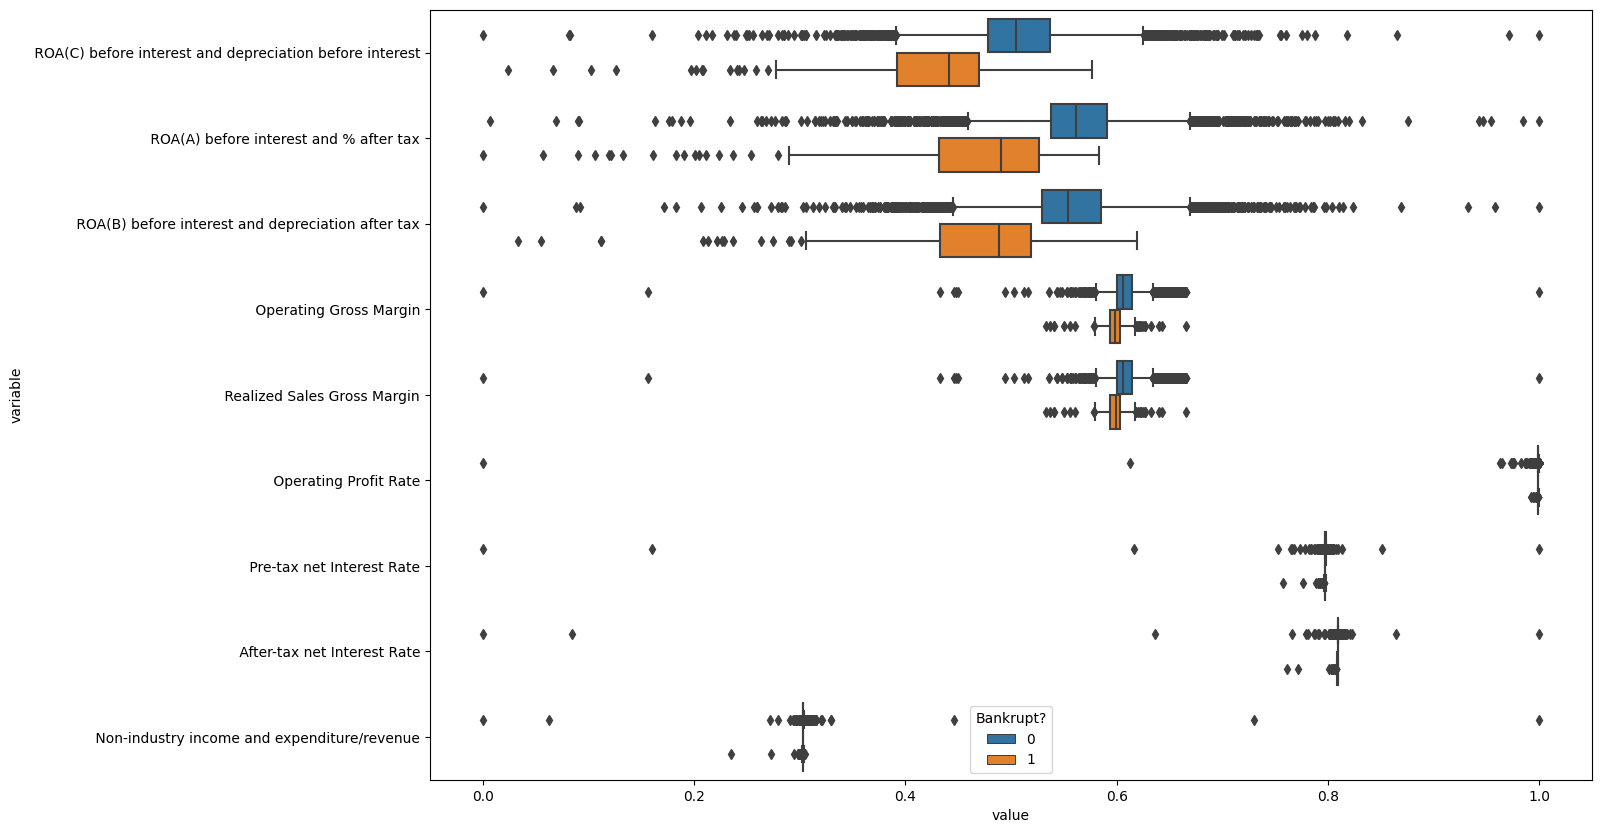

In [7]:
fig, axs = plt.subplots(figsize=(15,10))
sns.boxplot(data=data_melted,x='value',y='variable', hue='Bankrupt?')

## Group 2

In [8]:
data_melted=pd.melt(data, id_vars=['Bankrupt?'],value_vars=['Bankrupt?',  ' Continuous interest rate (after tax)',
' Operating Expense Rate',
' Research and development expense rate',
' Cash flow rate',
' Interest-bearing debt interest rate',
' Tax rate (A)',
' Net Value Per Share (B)',
' Net Value Per Share (A)',
' Net Value Per Share (C)'])

<Axes: xlabel='value', ylabel='variable'>

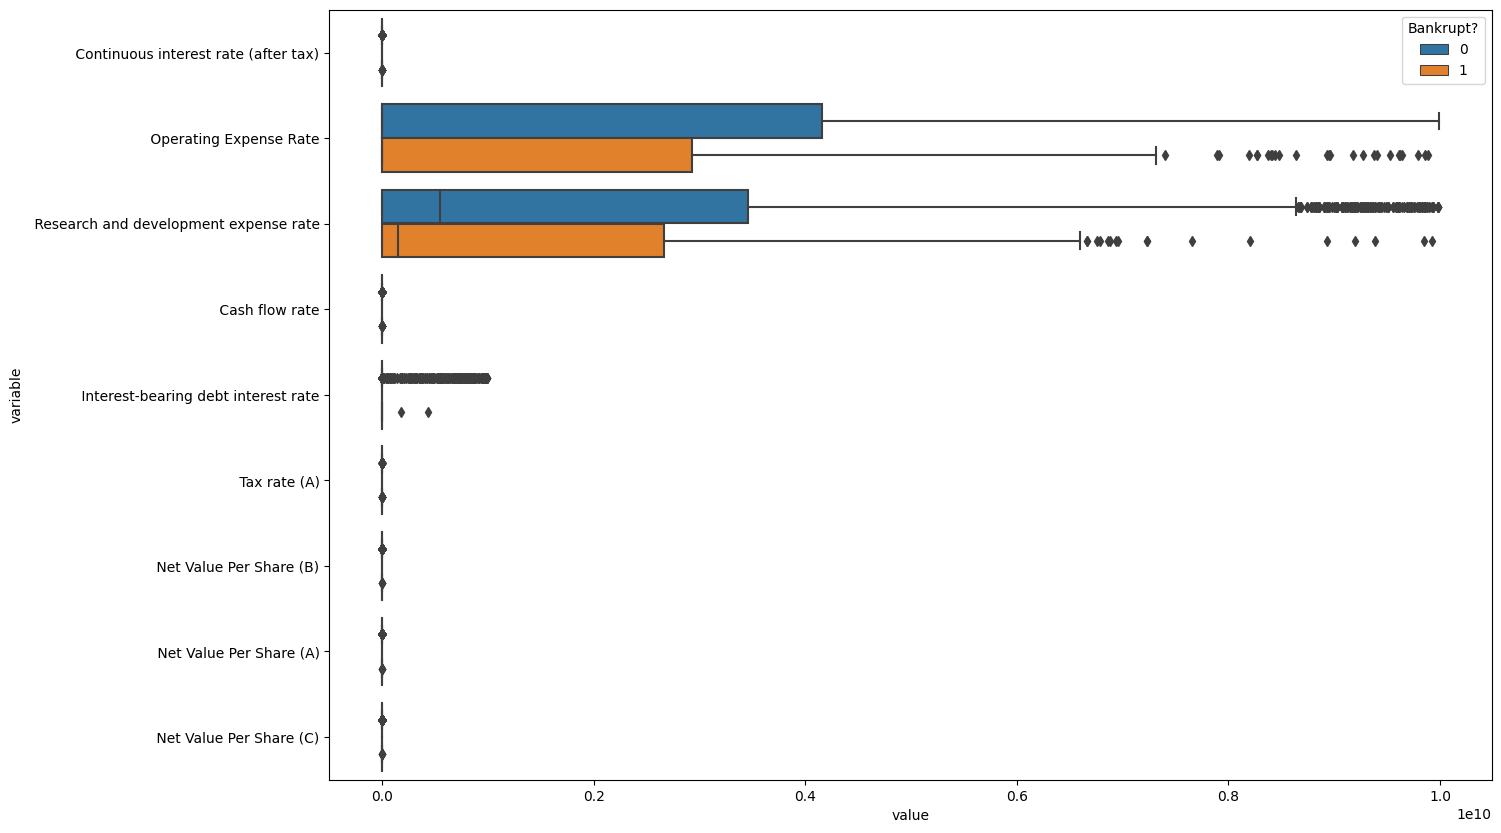

In [9]:
fig, axs = plt.subplots(figsize=(15,10))
sns.boxplot(data=data_melted,x='value',y='variable', hue='Bankrupt?')

## Group 3

In [10]:
data_melted=pd.melt(data, id_vars=['Bankrupt?'],value_vars=['Bankrupt?',  ' Persistent EPS in the Last Four Seasons',
' Cash Flow Per Share',
' Revenue Per Share (Yuan ¥)',
' Operating Profit Per Share (Yuan ¥)',
' Per Share Net profit before tax (Yuan ¥)',
' Realized Sales Gross Profit Growth Rate',
' Operating Profit Growth Rate',
' After-tax Net Profit Growth Rate',
' Regular Net Profit Growth Rate'])

<Axes: xlabel='value', ylabel='variable'>

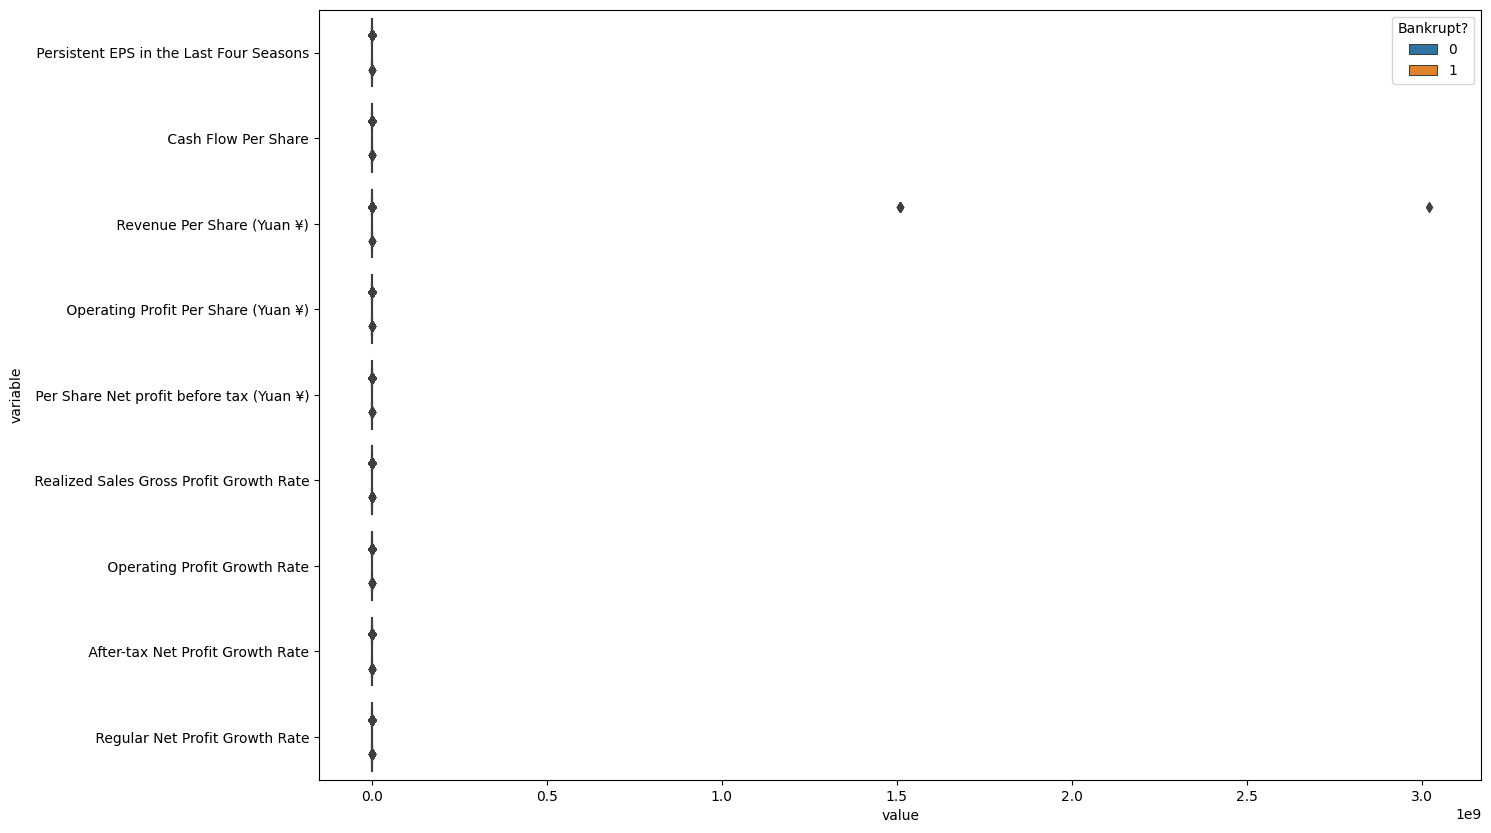

In [11]:
fig, axs = plt.subplots(figsize=(15,10))
sns.boxplot(data=data_melted,x='value',y='variable', hue='Bankrupt?')

## Group 4

In [12]:
data_melted=pd.melt(data, id_vars=['Bankrupt?'],value_vars=['Bankrupt?', ' Continuous Net Profit Growth Rate',
' Total Asset Growth Rate',
' Net Value Growth Rate',
' Total Asset Return Growth Rate Ratio',
' Cash Reinvestment %',
' Current Ratio',
' Quick Ratio',
' Interest Expense Ratio',
' Total debt/Total net worth'])

<Axes: xlabel='value', ylabel='variable'>

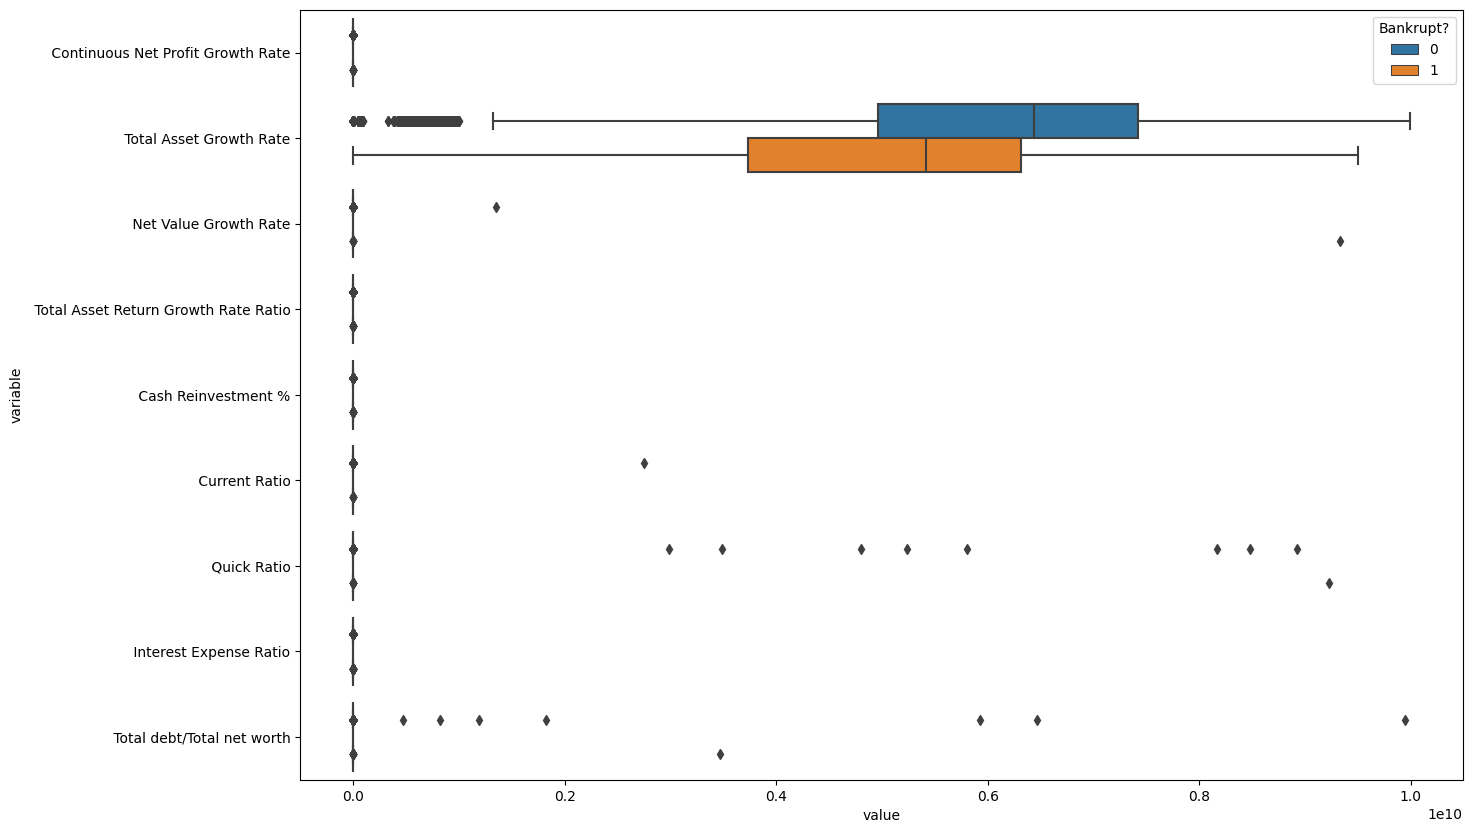

In [13]:
fig, axs = plt.subplots(figsize=(15,10))
sns.boxplot(data=data_melted,x='value',y='variable', hue='Bankrupt?')

## Group 5

In [14]:
data_melted=pd.melt(data, id_vars=['Bankrupt?'],value_vars=['Bankrupt?',  ' Debt ratio %',
' Net worth/Assets',
' Long-term fund suitability ratio (A)',
' Borrowing dependency',
' Contingent liabilities/Net worth',
' Operating profit/Paid-in capital',
' Net profit before tax/Paid-in capital',
' Inventory and accounts receivable/Net value',
' Total Asset Turnover'])

<Axes: xlabel='value', ylabel='variable'>

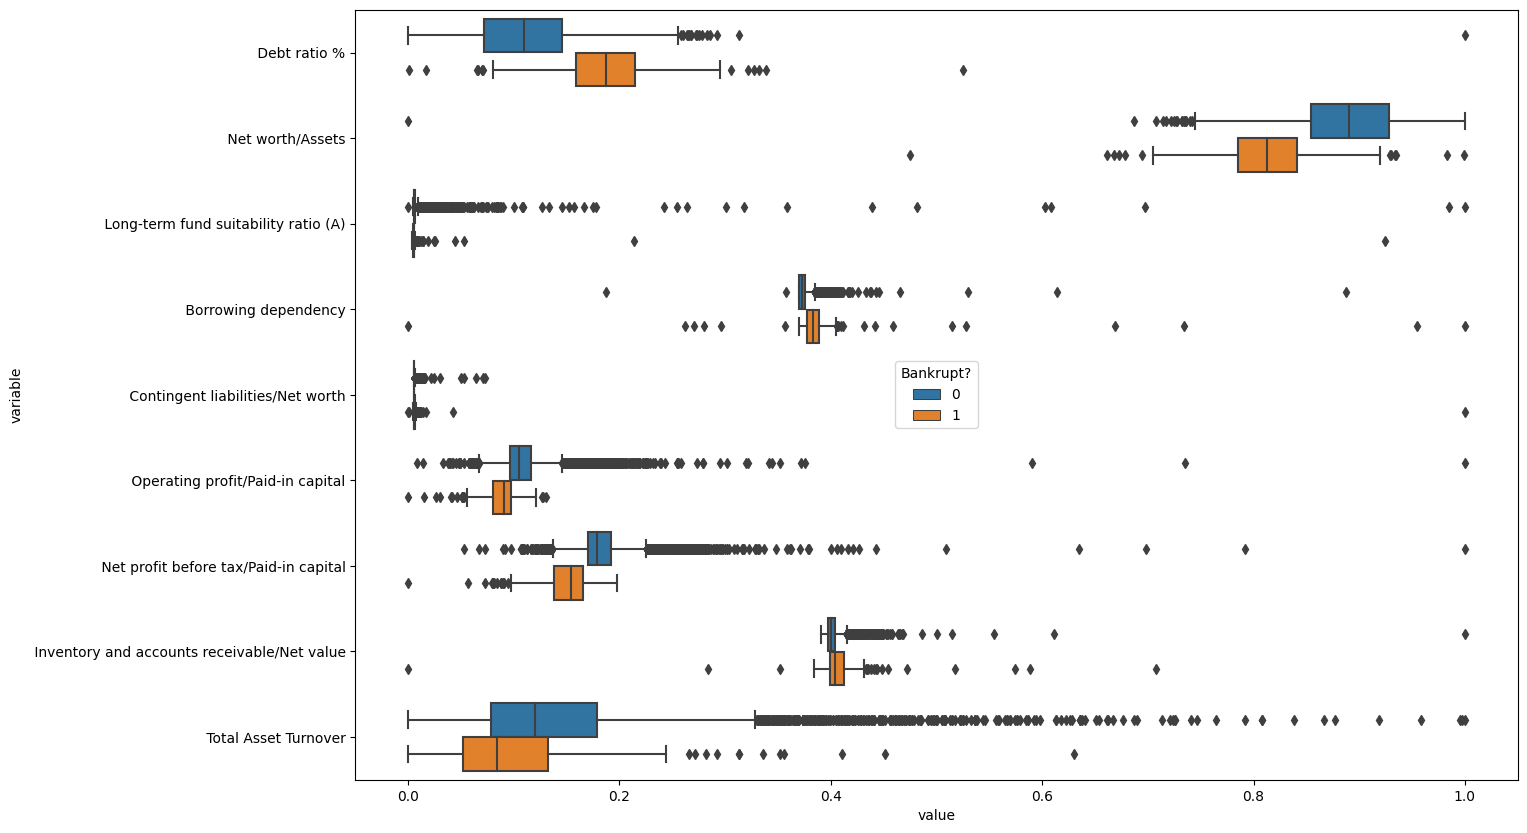

In [15]:
fig, axs = plt.subplots(figsize=(15,10))
sns.boxplot(data=data_melted,x='value',y='variable', hue='Bankrupt?')

## Group 6

In [16]:
data_melted=pd.melt(data, id_vars=['Bankrupt?'],value_vars=['Bankrupt?', ' Accounts Receivable Turnover',
' Average Collection Days',
' Inventory Turnover Rate (times)',
' Fixed Assets Turnover Frequency',
' Net Worth Turnover Rate (times)',
' Revenue per person',
' Operating profit per person',
' Allocation rate per person',
' Working Capital to Total Assets'])

<Axes: xlabel='value', ylabel='variable'>

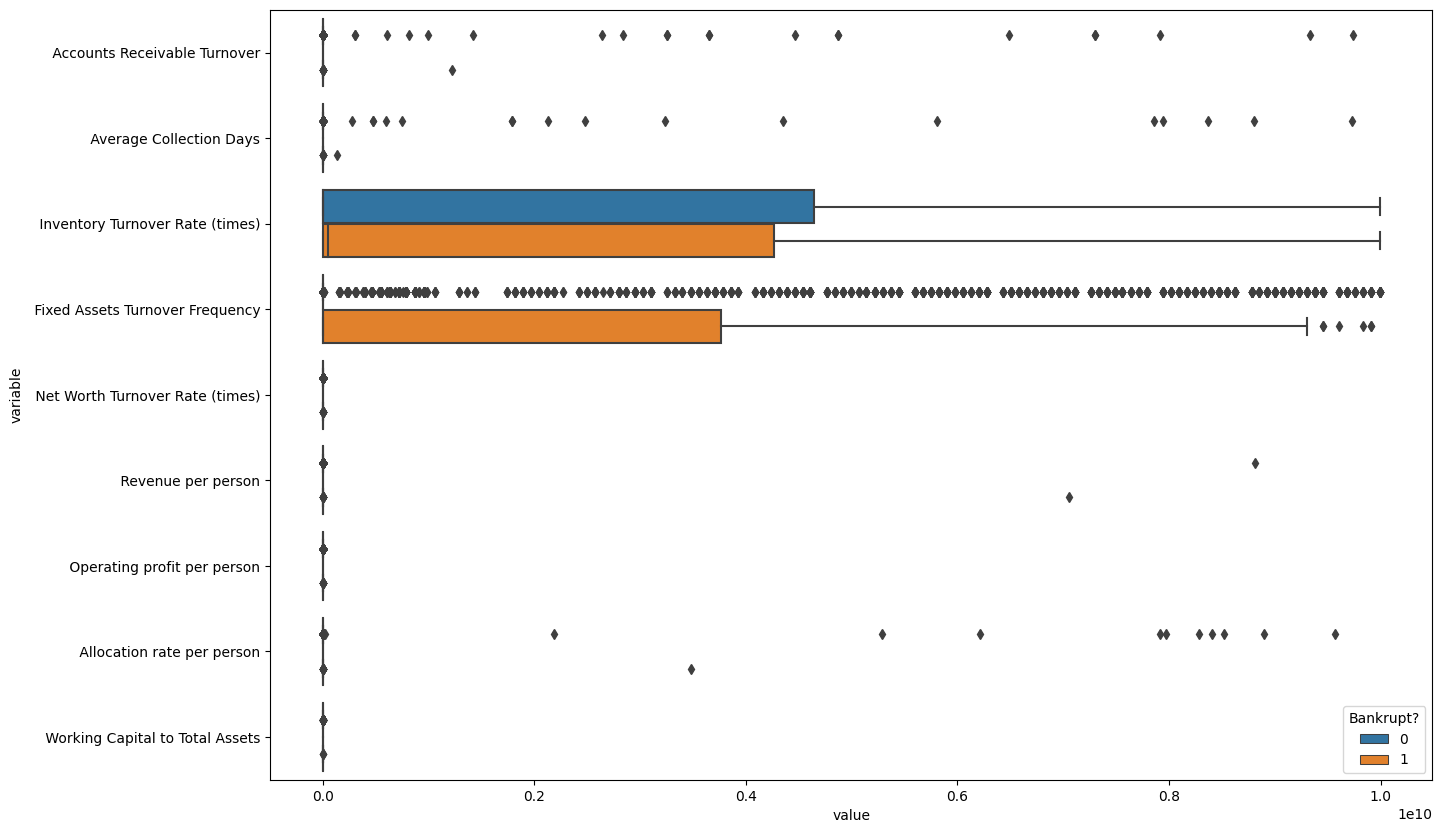

In [17]:
fig, axs = plt.subplots(figsize=(15,10))
sns.boxplot(data=data_melted,x='value',y='variable', hue='Bankrupt?')

## Group 7

In [18]:
data_melted=pd.melt(data, id_vars=['Bankrupt?'],value_vars=['Bankrupt?',  ' Quick Assets/Total Assets',
' Current Assets/Total Assets',
' Cash/Total Assets',
' Quick Assets/Current Liability',
' Cash/Current Liability',
' Current Liability to Assets',
' Operating Funds to Liability',
' Inventory/Working Capital',
' Inventory/Current Liability'])

<Axes: xlabel='value', ylabel='variable'>

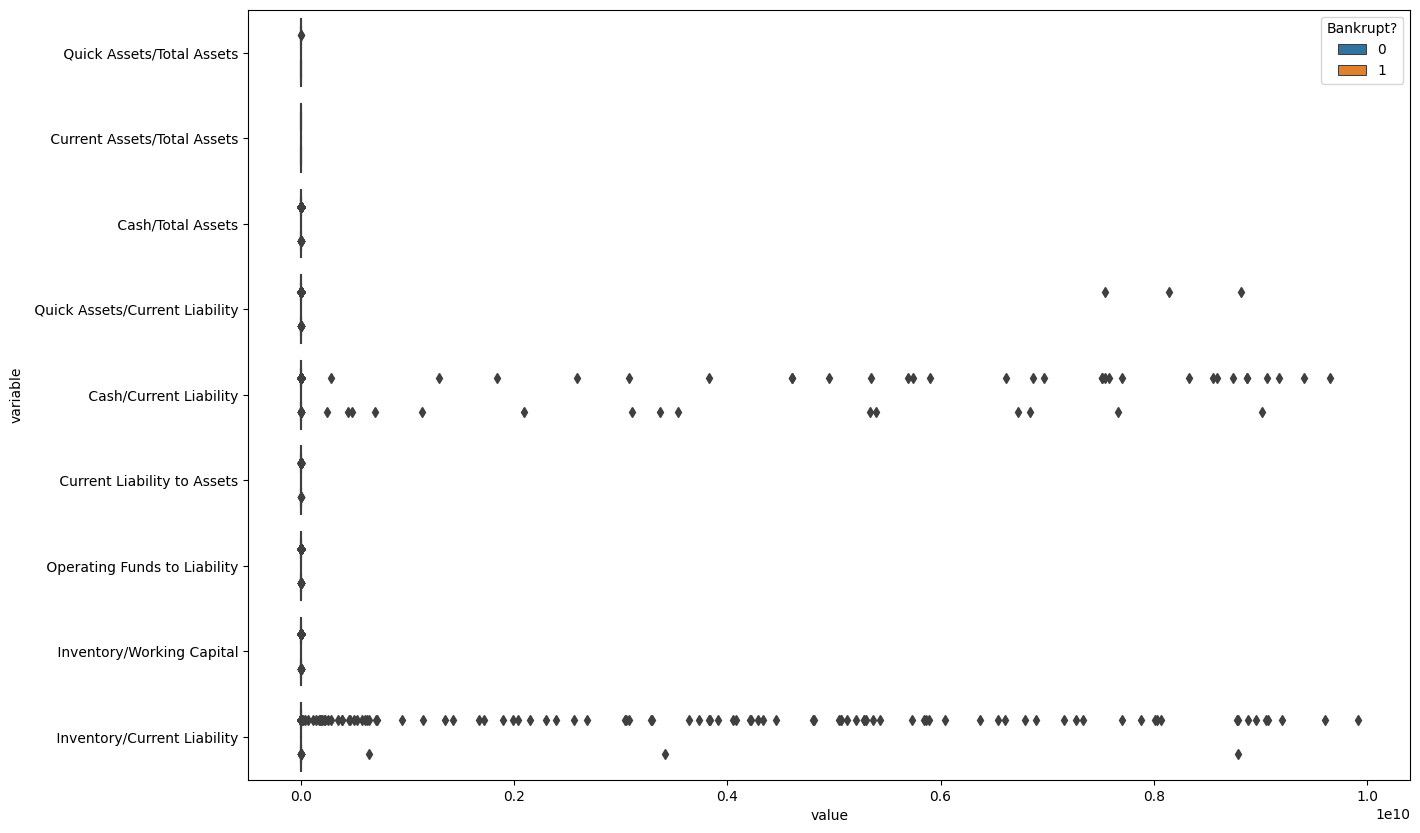

In [19]:
fig, axs = plt.subplots(figsize=(15,10))
sns.boxplot(data=data_melted,x='value',y='variable', hue='Bankrupt?')

## Group 8

In [20]:
data_melted=pd.melt(data, id_vars=['Bankrupt?'],value_vars=['Bankrupt?', ' Current Liabilities/Liability',
' Working Capital/Equity',
' Current Liabilities/Equity',
' Long-term Liability to Current Assets',
' Retained Earnings to Total Assets',
' Total income/Total expense',
' Total expense/Assets',
' Current Asset Turnover Rate',
' Quick Asset Turnover Rate'])

<Axes: xlabel='value', ylabel='variable'>

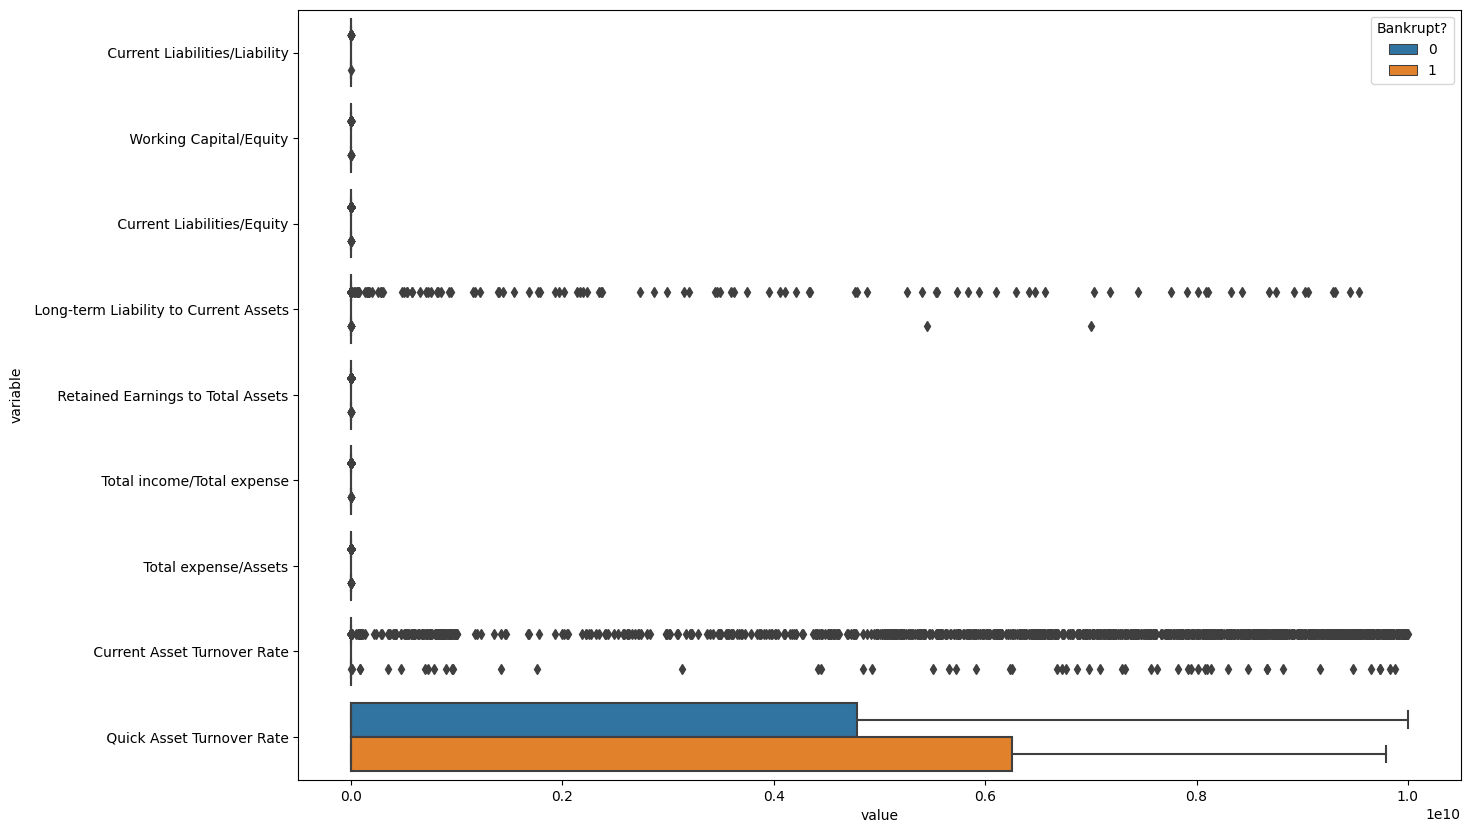

In [21]:
fig, axs = plt.subplots(figsize=(15,10))
sns.boxplot(data=data_melted,x='value',y='variable', hue='Bankrupt?')

## Group 9

In [22]:
data_melted=pd.melt(data, id_vars=['Bankrupt?'],value_vars=['Bankrupt?', ' Working capitcal Turnover Rate',
' Cash Turnover Rate',
' Cash Flow to Sales',
' Fixed Assets to Assets',
' Current Liability to Liability',
' Current Liability to Equity',
' Equity to Long-term Liability',
' Cash Flow to Total Assets',
' Cash Flow to Liability'])

<Axes: xlabel='value', ylabel='variable'>

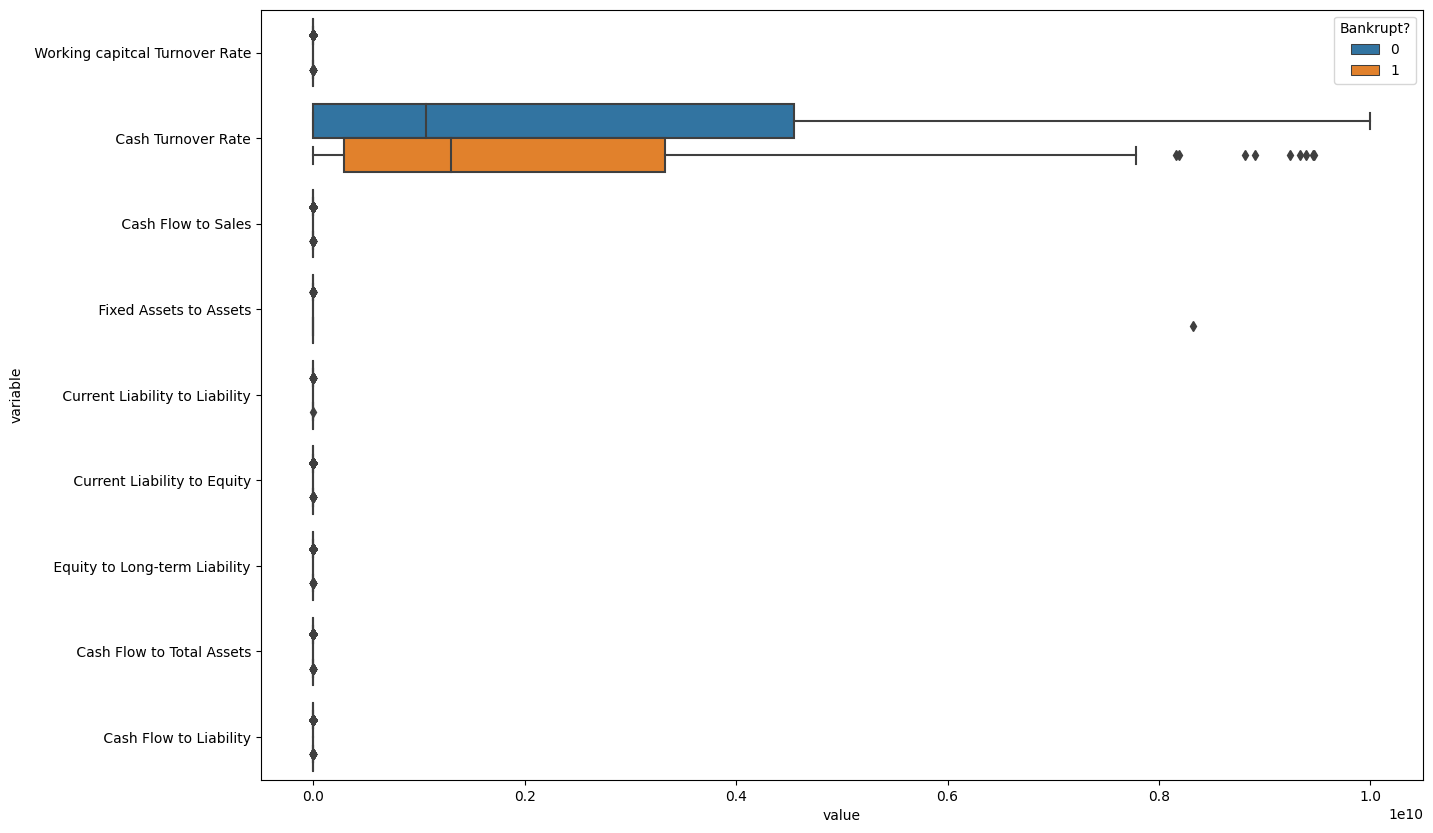

In [23]:
fig, axs = plt.subplots(figsize=(15,10))
sns.boxplot(data=data_melted,x='value',y='variable', hue='Bankrupt?')

## Group 10

In [24]:
data_melted=pd.melt(data, id_vars=['Bankrupt?'],value_vars=['Bankrupt?', ' CFO to Assets',
' Cash Flow to Equity',
' Current Liability to Current Assets',
' Liability-Assets Flag',
' Net Income to Total Assets',
' Total assets to GNP price',
' No-credit Interval',
' Gross Profit to Sales'])

<Axes: xlabel='value', ylabel='variable'>

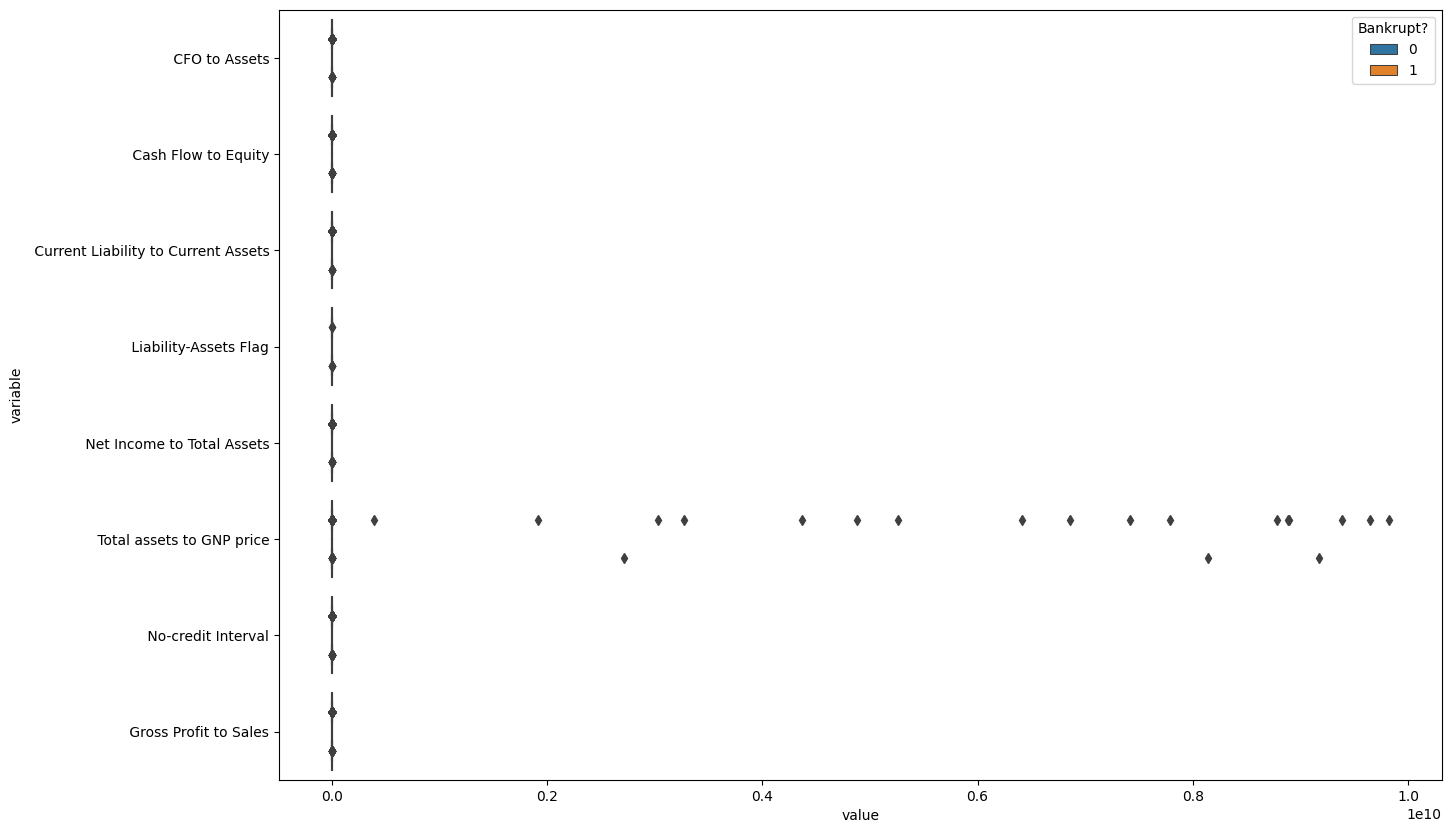

In [25]:
fig, axs = plt.subplots(figsize=(15,10))
sns.boxplot(data=data_melted,x='value',y='variable', hue='Bankrupt?')

## Group 11

In [26]:
data_melted=pd.melt(data, id_vars=['Bankrupt?'],value_vars=['Bankrupt?', ' Liability to Equity',
' Degree of Financial Leverage (DFL)',
' Interest Coverage Ratio (Interest expense to EBIT)',
' Net Income Flag',
' Equity to Liability'])

<Axes: xlabel='value', ylabel='variable'>

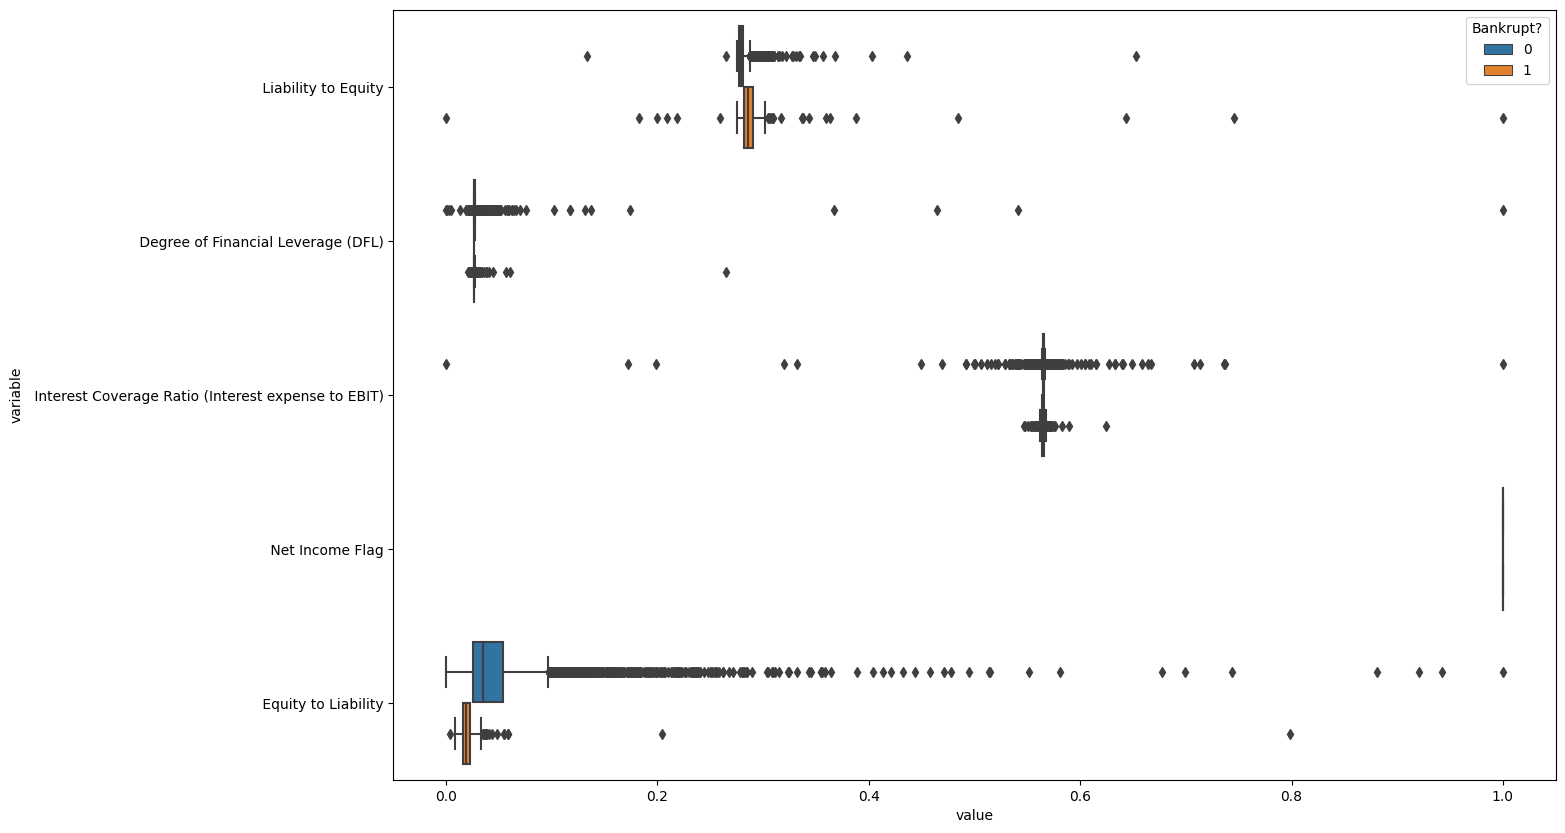

In [27]:
fig, axs = plt.subplots(figsize=(15,10))
sns.boxplot(data=data_melted,x='value',y='variable', hue='Bankrupt?')

## Conclusion - Variable Selection

Identifying variables that provide effective discrimination between classes 0 and 1 is crucial for accurate data classification. In this context, six key variables have been identified:

- ROA(C) before interest and depreciation before interest
- ROA(B) before interest and depreciation after tax
- ROA(A) before interest and % after tax
- Equity to Liability
- Net worth/Assets
- Debt ratio %

These variables offer valuable insights for decision-making and financial risk analysis. By considering these metrics together, a more comprehensive understanding of a company's financial health and its likelihood of bankruptcy can be obtained.

- **ROA(C) before interest and depreciation before interest:** This measure of profitability before interest and depreciation is critical for evaluating a company's financial performance.

- **ROA(B) before interest and depreciation after tax:** Another profitability indicator, this time after taxes and depreciation, provides a more complete view of financial performance.

- **ROA(A) before interest and % after tax:** This profitability indicator before interest and after taxes offers important insights into a company's profitability.

- **Equity to Liability:** The ratio of equity to liabilities is an indicator of financial strength and a company's ability to meet its obligations.

- **Net worth/Assets:** This ratio evaluates the proportion of assets funded through net worth, which can be crucial for financial stability.

- **Debt ratio %:** The ratio of debt to total assets is a key indicator of a company's debt burden.

-----------------------------------------------------------


# Scatterplots and Bivariate Distributions.

With the selected variables, we will create scatterplots to visualize relationships between pairs of variables, helping us identify patterns and trends in our analysis. Subsequently, we will apply Principal Component Analysis (PCA) to these variables to simplify the data's dimensionality. This will facilitate the visualization of relationships in a reduced-dimensional space, which can be essential for understanding the underlying structure of our data and making informed decisions in further analyses.

In a scatterplot, each point represents an observation in the dataset and is placed in the two-dimensional space defined by two variables. By observing the dispersion of points and their clustering, we can gain insights into the relationship between those two variables. For instance, if points tend to form an upward diagonal line, it may indicate a positive correlation, while a downward diagonal line could suggest a negative correlation.

In addition to scatterplots, we will also utilize Seaborn's Pairplot. Pairplot allows us to create a matrix of scatterplots for all possible combinations of the selected variables. This is valuable for gaining a comprehensive view of the relationships between variables and detecting more complex interaction patterns.

This exploratory analysis will enhance our understanding of the data's structure and provide valuable insights for the subsequent stage, where we will implement Principal Component Analysis (PCA) on the selected variables. PCA will enable us to reduce the data's dimensionality while preserving the most essential information, making it easier to visualize and interpret the relationships between variables in a reduced-dimensional space."

## Categorization of Variables for Joint Visualization in Scatter Plots

We have a database that includes four variables. It's important to note that when using scatter plots, we can only simultaneously visualize three of these variables in a single graph.

Set 1:
- ROA(C) before interest and depreciation before interest
- ROA(B) before interest and depreciation after tax
- ROA(A) before interest and % after tax

Set 2:
- Equity to Liability
- Net worth/Assets
- Debt ratio %




In [61]:
X_filter = data[['Bankrupt?', ' ROA(C) before interest and depreciation before interest', ' ROA(B) before interest and depreciation after tax', ' ROA(A) before interest and % after tax',' Equity to Liability', ' Net worth/Assets', ' Debt ratio %']]
X_filter

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(B) before interest and depreciation after tax,ROA(A) before interest and % after tax,Equity to Liability,Net worth/Assets,Debt ratio %
0,1,0.370594,0.405750,0.424389,0.016469,0.792424,0.207576
1,1,0.464291,0.516730,0.538214,0.020794,0.828824,0.171176
2,1,0.426071,0.472295,0.499019,0.016474,0.792484,0.207516
3,1,0.399844,0.457733,0.451265,0.023982,0.848535,0.151465
4,1,0.465022,0.522298,0.538432,0.035490,0.893491,0.106509
...,...,...,...,...,...,...,...
6814,0,0.493687,0.543230,0.539468,0.029890,0.875382,0.124618
6815,0,0.475162,0.524172,0.538269,0.038284,0.900747,0.099253
6816,0,0.472725,0.520638,0.533744,0.097649,0.961061,0.038939
6817,0,0.506264,0.554045,0.559911,0.044009,0.913021,0.086979


In [62]:
X1=X_filter.drop('Bankrupt?',axis=1)
y1=X_filter['Bankrupt?'].values.reshape(-1,1)

In [63]:
X2=pd.DataFrame(data=X1)
y2=pd.DataFrame(data=y1)
Xdf=pd.concat([X2,y2], axis=1)
Xdf.columns=['f1','f2','f3','f4','f5','f6','label']

In [58]:
Xdf

,f1,f2,f3,f4,label
0,0.405750,0.601457,0.601457,0.302646,1
1,0.516730,0.610235,0.610235,0.303556,1
2,0.472295,0.601450,0.601364,0.302035,1
3,0.457733,0.583541,0.583541,0.303350,1
4,0.522298,0.598783,0.598783,0.303475,1
...,...,...,...,...,...
6814,0.543230,0.604455,0.604462,0.303510,0
6815,0.524172,0.598308,0.598308,0.303520,0
6816,0.520638,0.610444,0.610213,0.303512,0
6817,0.554045,0.607850,0.607850,0.303498,0


In [60]:
import plotly.express as px
colors = px.colors.sequential.Plasma
colors[0], colors[1], colors[2] = ['red', 'green', 'blue']
fig = px.scatter_3d(Xdf, x='f1', y='f2', z='f3', color=Xdf['label'].astype(str), color_discrete_sequence=colors, height=500, width=500)
fig.update_layout(showlegend=False,
                  scene_camera=dict(up=dict(x=0, y=0, z=1),
                                    center=dict(x=0, y=0, z=-0.1),
                                    eye=dict(x=1.5, y=-1.4, z=0.5)),
                  margin=dict(l=0, r=0, b=0, t=0),
                  scene=dict(xaxis=dict(backgroundcolor='white',
                                        color='black',
                                        gridcolor='#f0f0f0',
                                        title_font=dict(size=10),
                                        tickfont=dict(size=10)),
                             yaxis=dict(backgroundcolor='white',
                                        color='black',
                                        gridcolor='#f0f0f0',
                                        title_font=dict(size=10),
                                        tickfont=dict(size=10)),
                             zaxis=dict(backgroundcolor='lightgrey',
                                        color='black',
                                        gridcolor='#f0f0f0',
                                        title_font=dict(size=10),
                                        tickfont=dict(size=10))))
fig.update_traces(marker=dict(size=3, line=dict(color='black', width=0.1)))
fig.show()

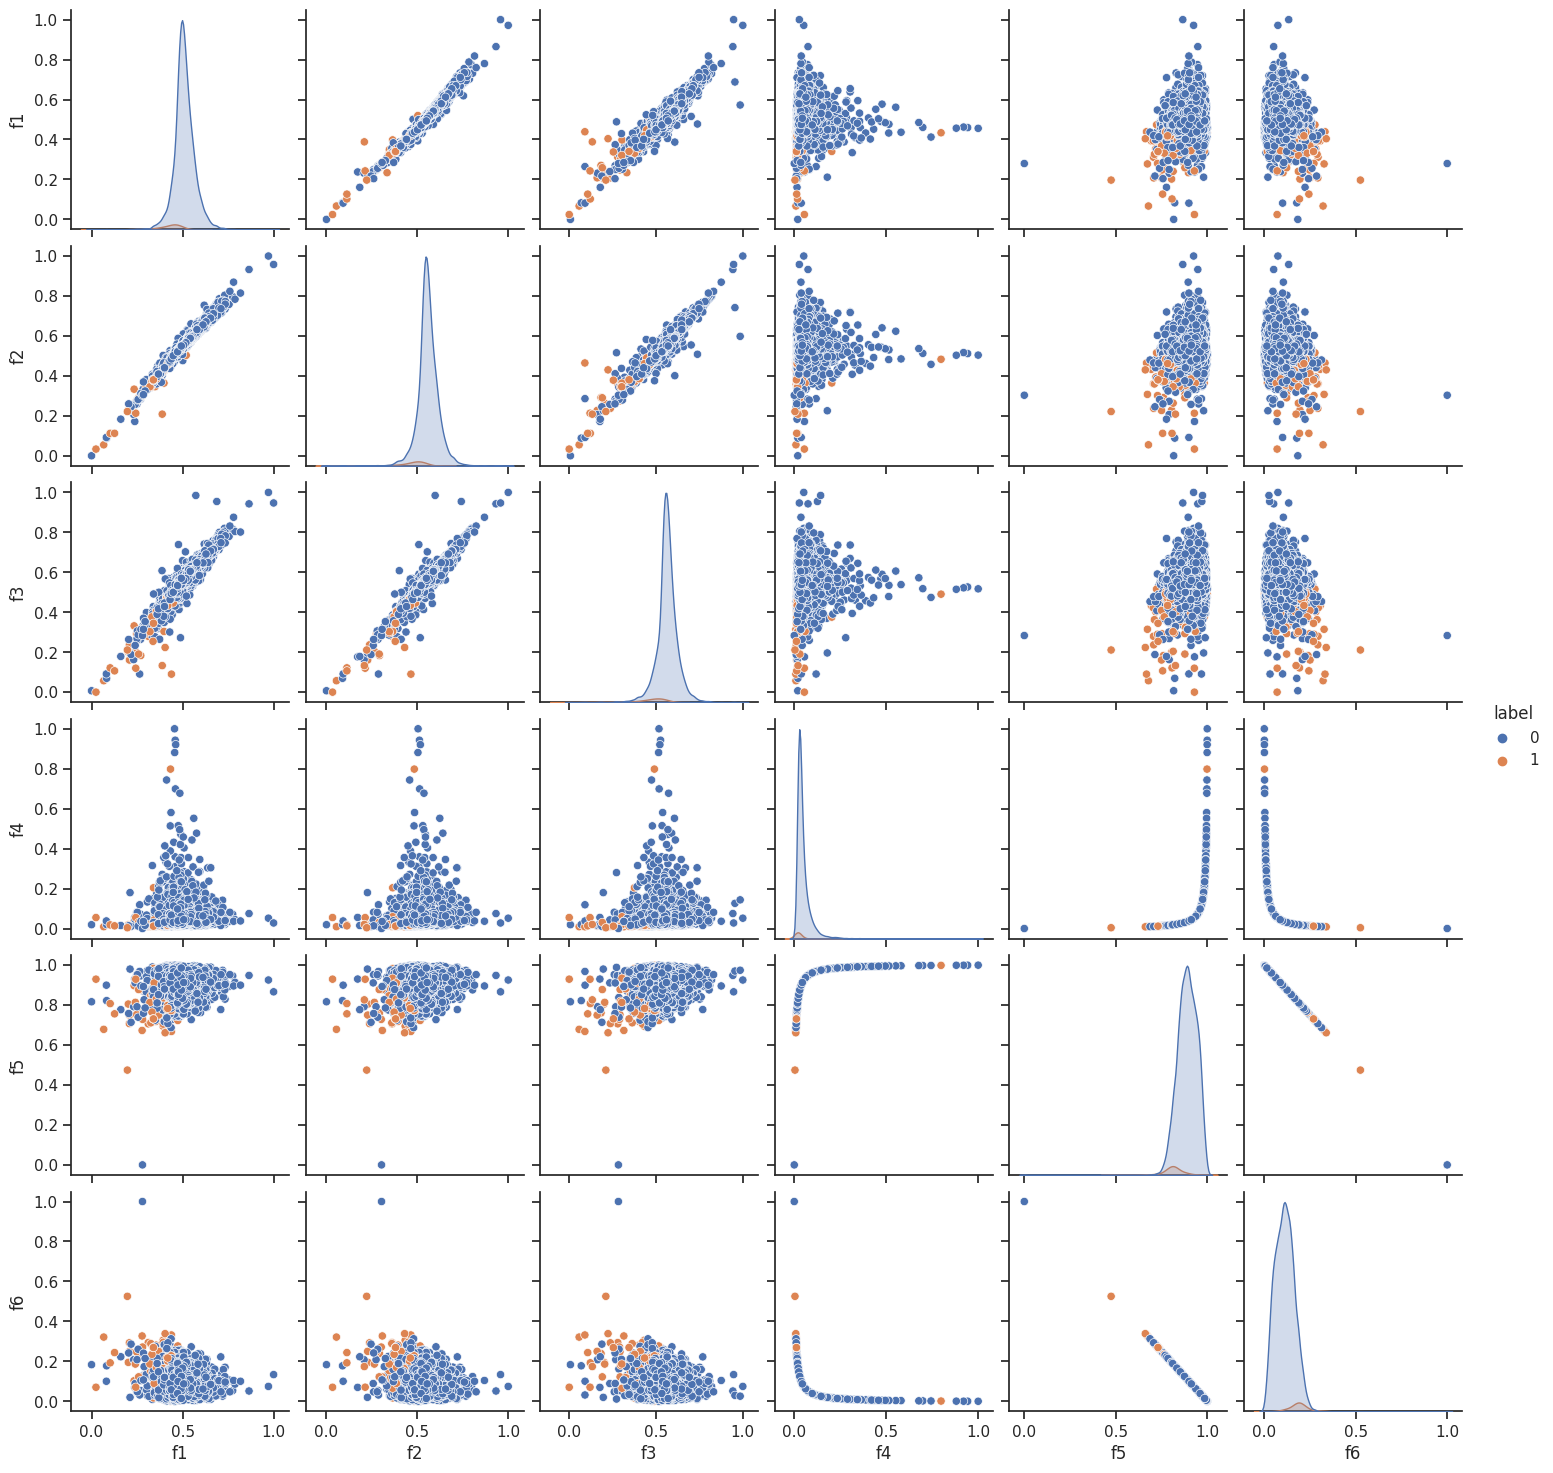

In [33]:
sns.set(style="ticks")
sns.pairplot(Xdf, hue='label', vars=['f1','f2','f3','f4','f5','f6'])

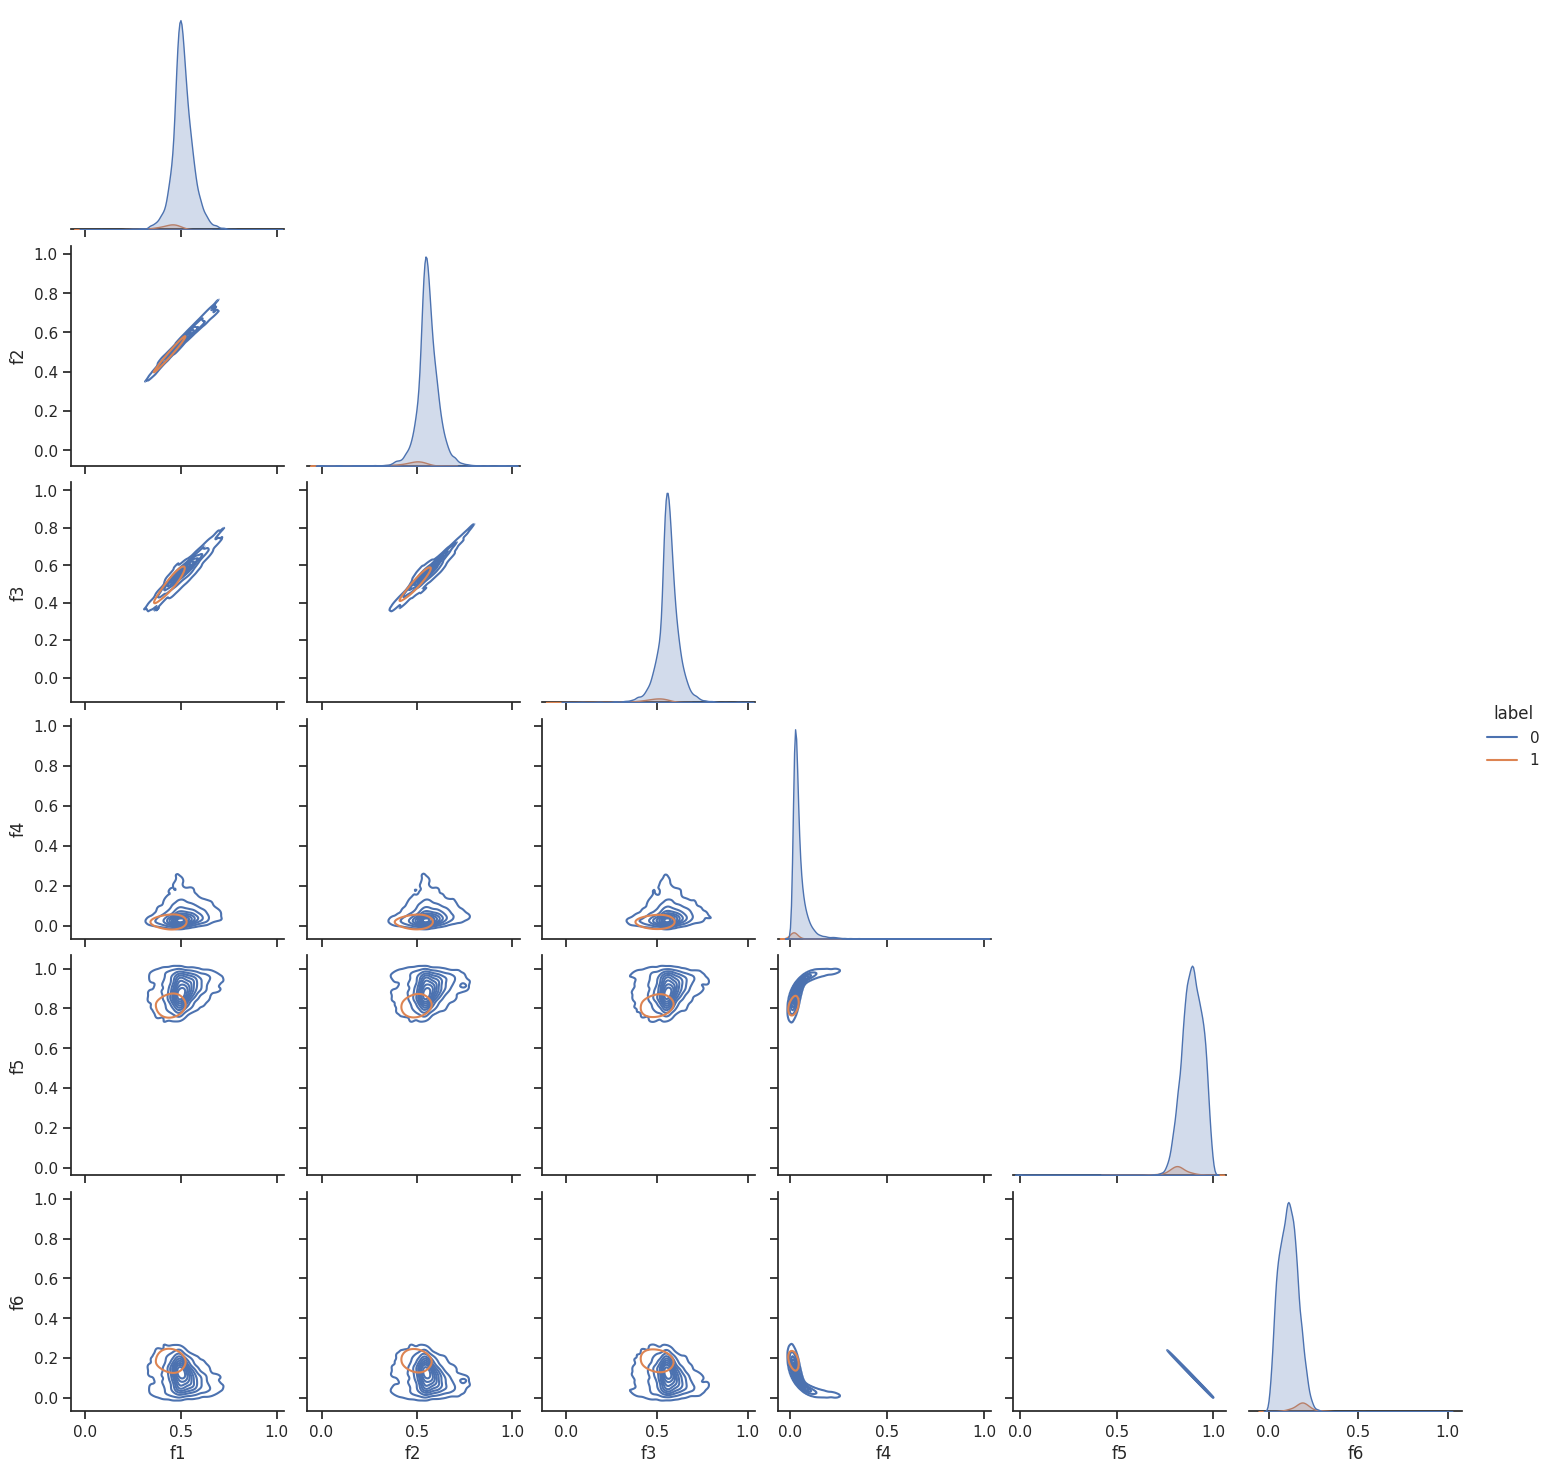

In [34]:
sns.pairplot(Xdf, hue="label", vars=['f1','f2','f3','f4','f5','f6'], kind="kde",markers=["o", "s", "D"],corner=True)

Through PCA, we can reduce the dimensions for a better data visualization.




In [35]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA(n_components=3)
componentes=pca.fit_transform(X2)

In [36]:
pca.explained_variance_ratio_

array([0.61320825, 0.31164698, 0.05949165])

We can see that the first two principal components explain almost all of the data variance. Let's visualize this graphically.

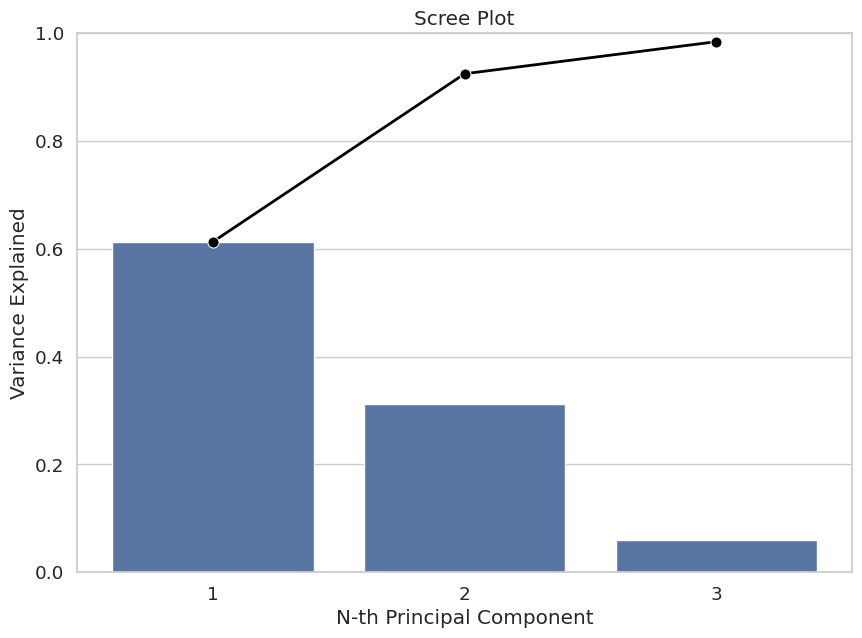

In [37]:
PC_components = np.arange(pca.n_components_) + 1
_ = sns.set(style='whitegrid', font_scale=1.2)
fig, ax = plt.subplots(figsize=(10, 7))
_ = sns.barplot(x=PC_components, y=pca.explained_variance_ratio_, color='b')
_ = sns.lineplot(x=PC_components-1, y=np.cumsum(pca.explained_variance_ratio_), color='black', linestyle='-', linewidth=2, marker='o', markersize=8)

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

In [38]:
C=pd.DataFrame(data=componentes)
y2=pd.DataFrame(data=y2)
Xdf=pd.concat([C,y2], axis=1)
Xdf.columns=['f1','f2','f3','label']

In [39]:
colors = px.colors.sequential.Plasma
colors[0], colors[1], colors[2] = ['red', 'green', 'blue']
fig = px.scatter_3d(Xdf, x='f1', y='f2', z='f3', color=Xdf['label'].astype(str), color_discrete_sequence=colors, height=500, width=500)
fig.update_layout(showlegend=False,
                  scene_camera=dict(up=dict(x=0, y=0, z=1),
                                    center=dict(x=0, y=0, z=-0.1),
                                    eye=dict(x=1.5, y=-1.4, z=0.5)),
                  margin=dict(l=0, r=0, b=0, t=0),
                  scene=dict(xaxis=dict(backgroundcolor='white',
                                        color='black',
                                        gridcolor='#f0f0f0',
                                        title_font=dict(size=10),
                                        tickfont=dict(size=10)),
                             yaxis=dict(backgroundcolor='white',
                                        color='black',
                                        gridcolor='#f0f0f0',
                                        title_font=dict(size=10),
                                        tickfont=dict(size=10)),
                             zaxis=dict(backgroundcolor='lightgrey',
                                        color='black',
                                        gridcolor='#f0f0f0',
                                        title_font=dict(size=10),
                                        tickfont=dict(size=10))))
fig.update_traces(marker=dict(size=3, line=dict(color='black', width=0.1)))
fig.show()

In [40]:
pca = PCA(n_components=2)
componentes=pca.fit_transform(X2)

([], [])

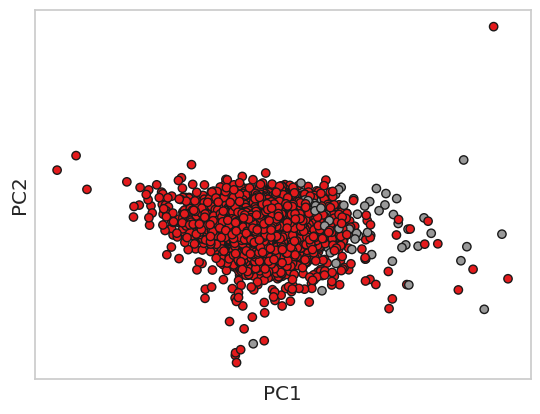

In [41]:
plt.scatter(componentes[:, 0], componentes[:, 1], c=y2, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("PC1")
plt.ylabel("PC2")


plt.xticks(())
plt.yticks(())

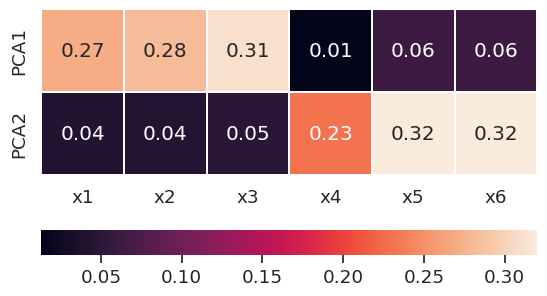

In [42]:
# Feature Weight
_ = sns.heatmap(pca.components_**2,
                 yticklabels=["PCA"+str(x) for x in range(1,pca.n_components_+1)],
                 xticklabels=['x1','x2','x3','x4','x5','x6'],
                 annot=True,
                 fmt='.2f',
                 square=True,
                 linewidths=0.05,
                 cbar_kws={"orientation": "horizontal"})


A heatmap is created to visualize the relative importance of the original features in the principal components after performing PCA. Rows represent the principal components (PCA1, PCA2, etc.), columns represent the original features (x1, x2, etc.), and the values in each cell display the contribution of each feature to each principal component. This can help you understand which features are more significant in the data representation after PCA.